In [51]:
import pylab as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.interpolate import interp2d, NearestNDInterpolator,LinearNDInterpolator

In [44]:
#to read file
pdmtn=pd.read_hdf('./MountainProfile.h5')

In [45]:

Xs=list(pdmtn.X)
Ys=list(pdmtn.Y)
Zs=list(pdmtn.Z)

#Make the interp function
interpolatedMountain=LinearNDInterpolator(np.array([Xs,Ys]).transpose(),Zs)

In [46]:

vals=[]
StepSize=5
X1= np.arange(min(Xs),max(Xs), StepSize)
Y1= np.arange(min(Ys),max(Ys), StepSize)

[xx,yy]=np.meshgrid(X1,Y1)
#heights=np.zeros_like(xx)*-2000
for ix in range(len(X1)):
    for iy in range(len(Y1)):
        heights[iy,ix]=interpolatedMountain(X1[ix],Y1[iy])

<ipython-input-47-98c0938e26ad>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,heights,cmap=cmap)


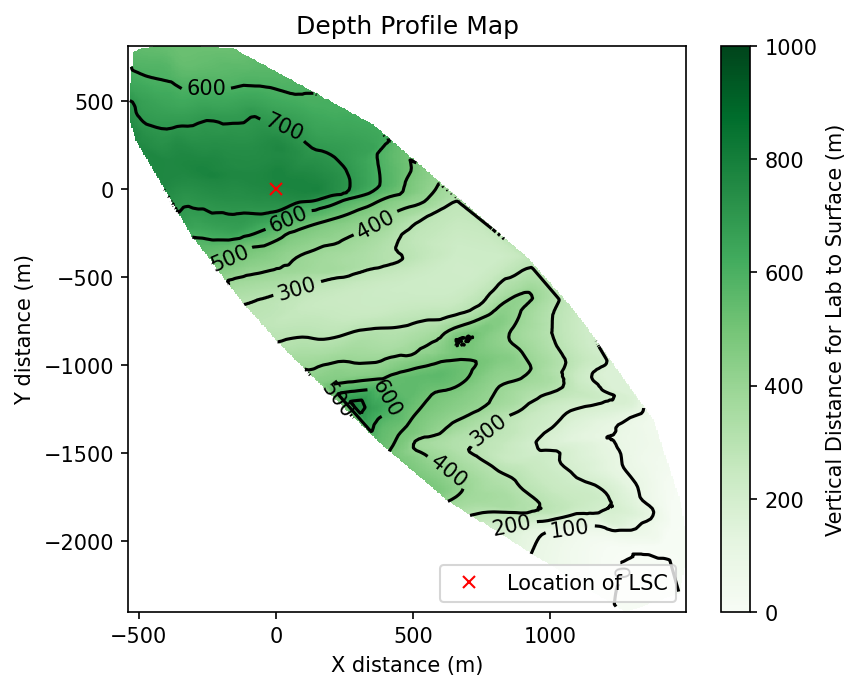

In [47]:
cmap = plt.get_cmap('Greens')
# Plot the height map
plt.figure(figsize=(6,5),dpi=150)
plt.pcolormesh(xx,yy,heights,cmap=cmap)

plt.colorbar(label='Vertical Distance for Lab to Surface (m)')
plt.clim(0,1000)


CS=plt.contour(xx,yy,heights,colors='black',levels=np.arange(0,1000,100))
plt.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')
#plt.ylim(Ymin,Ymax)
#plt.xlim(Xmin,Xmax)
plt.xlabel("X distance (m)")
plt.ylabel("Y distance (m)")
plt.title("Depth Profile Map")
plt.plot([0],[0],'x',label='Location of LSC',color='red')
plt.legend(loc='lower right')

In [48]:

Xs=list(pdmtn.X)
Ys=list(pdmtn.Y)
Zs=list(pdmtn.Z)


#interpolate out smoothly to these corner points
Xs.append(min(Xs));Ys.append(min(Ys));Zs.append(200)
Xs.append(max(Xs));Ys.append(max(Ys));Zs.append(200)

#Make the interp function
interpolatedMountain=LinearNDInterpolator(np.array([Xs,Ys]).transpose(),Zs)

In [49]:

vals=[]
StepSize=5
X1= np.arange(min(Xs),max(Xs), StepSize)
Y1= np.arange(min(Ys),max(Ys), StepSize)

[xx,yy]=np.meshgrid(X1,Y1)
#heights=np.zeros_like(xx)*-2000
for ix in range(len(X1)):
    for iy in range(len(Y1)):
        heights[iy,ix]=interpolatedMountain(X1[ix],Y1[iy])

<ipython-input-54-751066741d3f>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,heights,cmap=cmap)


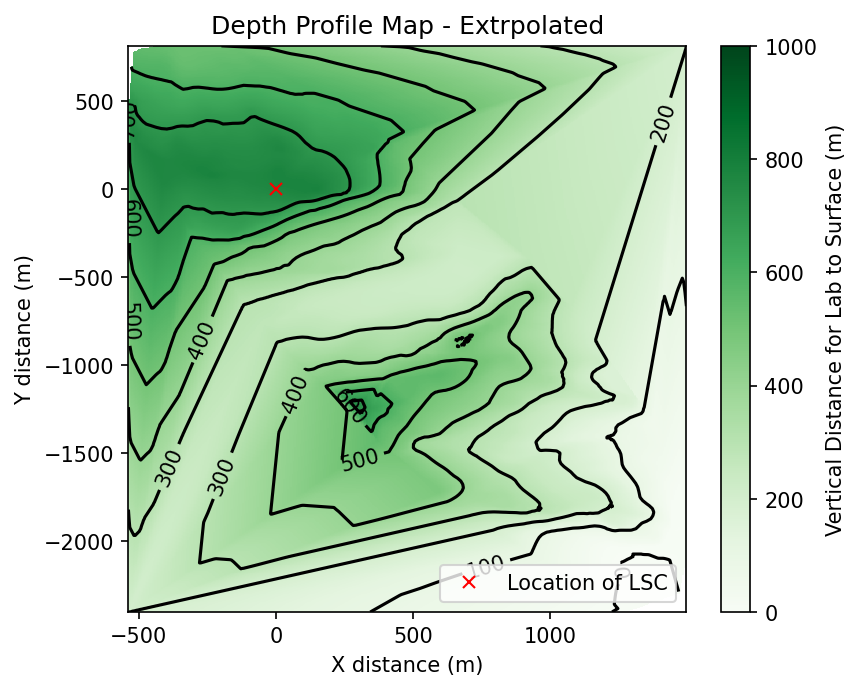

In [54]:
cmap = plt.get_cmap('Greens')
# Plot the height map
plt.figure(figsize=(6,5),dpi=150)
plt.pcolormesh(xx,yy,heights,cmap=cmap)

plt.colorbar(label='Vertical Distance for Lab to Surface (m)')
plt.clim(0,1000)


CS=plt.contour(xx,yy,heights,colors='black',levels=np.arange(0,1000,100))
plt.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')
#plt.ylim(Ymin,Ymax)
#plt.xlim(Xmin,Xmax)
plt.xlabel("X distance (m)")
plt.ylabel("Y distance (m)")
plt.title("Depth Profile Map - Extrpolated")
plt.plot([0],[0],'x',label='Location of LSC',color='red')
plt.legend(loc='lower right')

In [53]:
f=open("ExtendedMountain.pkl",'wb')
pickle.dump(interpolatedMountain,f)
f.close()